STEUP

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns



DATASET

In [307]:
df = pd.read_csv('./bigml_59c28831336c6604c800002a.csv')
df.shape

(3333, 21)

In [308]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [309]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [310]:
# Preparing Table
a = round(df['churn'].value_counts()/len(df['churn']),2)
churn_ratio=  pd.DataFrame(a).T 
churn_ratio = churn_ratio.rename(columns={'no':'Not Churn' , 'yes':'Churn'})
churn_ratio 

,False,True
churn,0.86,0.14


c:\Users\jebalia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

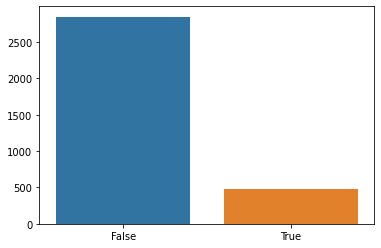

In [311]:
y = df['churn'].value_counts()
sns.barplot(y.index , y.values)

In [312]:
y_true = df['churn'][df['churn']==True]
churn_per = (y_true.shape[0] / df['churn'].shape[0])*100

print("churn Percentage = " + str(churn_per))

churn Percentage = 14.491449144914492


DESCRIPTIVE ANALYSIS

In [313]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


churn by state

<AxesSubplot:xlabel='state'>

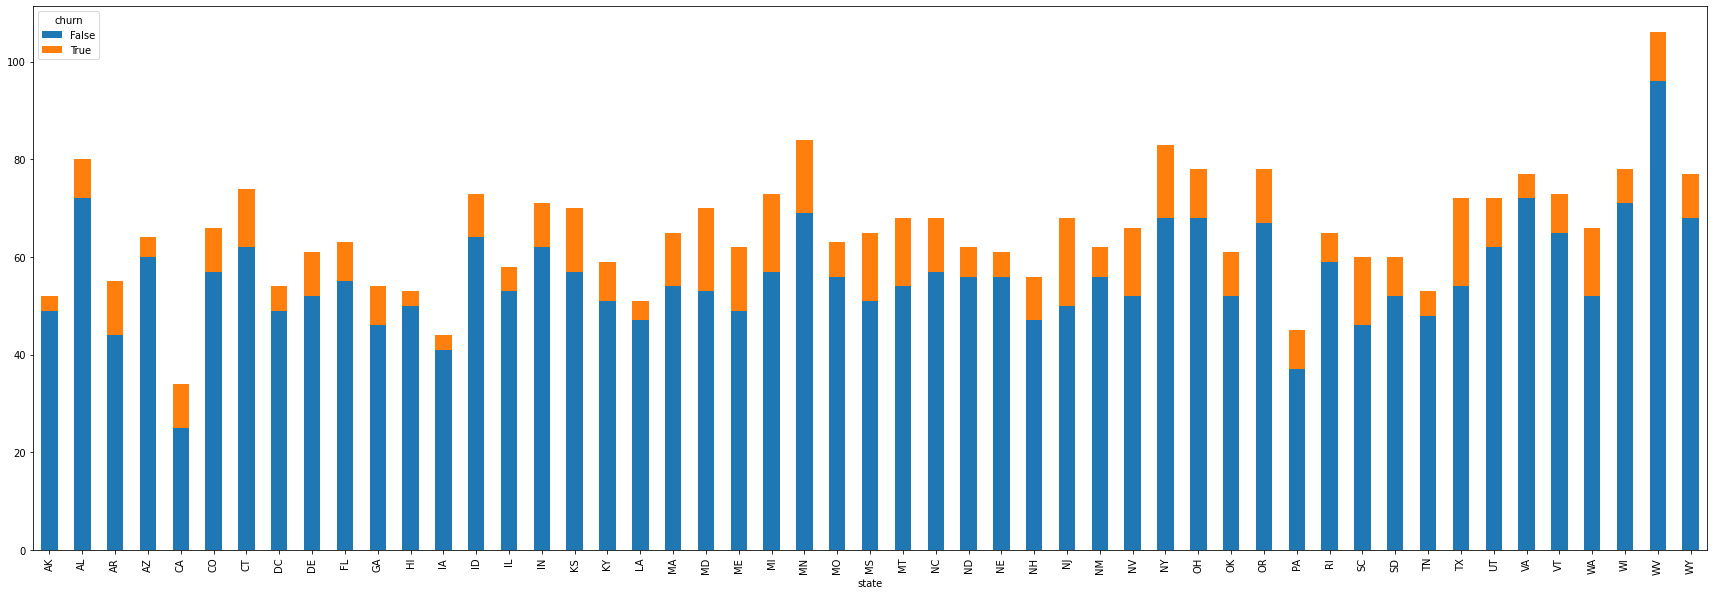

In [314]:
df.groupby(['state' , 'churn']).size().unstack().plot(kind='bar', stacked=True , figsize=(30,10))

Churn by Area Code

<AxesSubplot:xlabel='area code'>

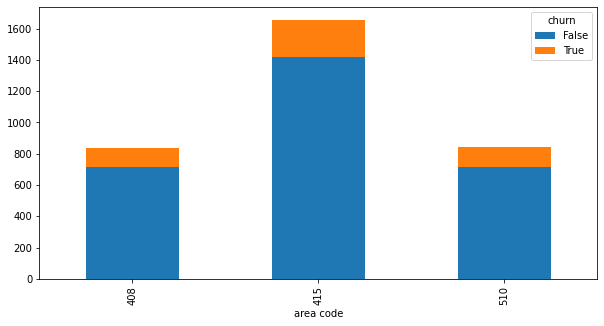

In [315]:
df.groupby(['area code' , 'churn']).size().unstack().plot(kind='bar', stacked=True , figsize=(10,5))

Churn by customers with international plan

<AxesSubplot:xlabel='international plan'>

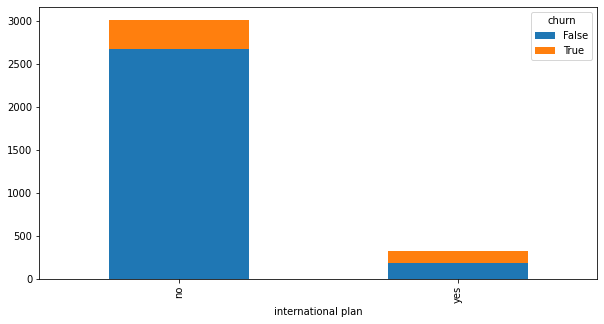

In [316]:
df.groupby(['international plan' , 'churn']).size().unstack().plot(kind='bar' , stacked=True , figsize=(10,5))

Churn with Voice mail plan

<AxesSubplot:xlabel='voice mail plan'>

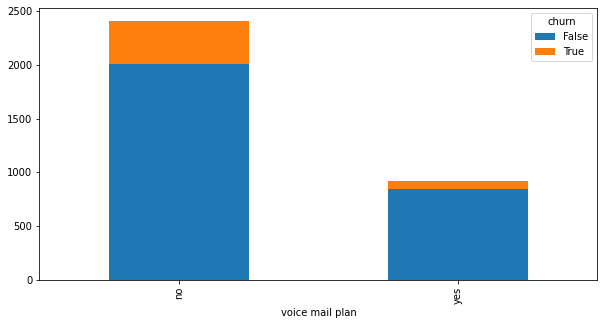

In [317]:
df.groupby(['voice mail plan' , 'churn']).size().unstack().plot(kind='bar', stacked=True , figsize=(10,5))

Handle Categorical Cols - Label Encoder

In [318]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [319]:
df['state'] = label_encoder.fit_transform(df['state'])
df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])

df.dtypes

state                       int32
account length              int64
area code                   int64
phone number               object
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [320]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [321]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


BUILD FEATUE MATRIX

In [322]:

y = df['churn'].to_numpy().astype(int)
y.size

3333

In [323]:
df.drop(['phone number' , 'churn'], axis=1, inplace =True)

In [324]:
x =df.to_numpy().astype(float)

In [325]:
x

array([[ 16.  , 128.  , 415.  , ...,   3.  ,   2.7 ,   1.  ],
       [ 35.  , 107.  , 415.  , ...,   3.  ,   3.7 ,   1.  ],
       [ 31.  , 137.  , 415.  , ...,   5.  ,   3.29,   0.  ],
       ...,
       [ 39.  ,  28.  , 510.  , ...,   6.  ,   3.81,   2.  ],
       [  6.  , 184.  , 510.  , ...,  10.  ,   1.35,   2.  ],
       [ 42.  ,  74.  , 415.  , ...,   4.  ,   3.7 ,   0.  ]])

In [326]:
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)

In [327]:
x

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.60119509,
        -0.0856905 , -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ..., -0.60119509,
         1.2411686 , -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.21153386,
         0.69715637, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  0.61789834,
         1.3871231 ,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ...,  2.24335625,
        -1.87695028,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ..., -0.19483061,
         1.2411686 , -1.1882185 ]])

Stratified Cross Validation 

In [328]:
from sklearn.model_selection import train_test_split


x_train , x_test , y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [329]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('GBC' , GradientBoostingClassifier()))
models.append(('SVC' , SVC()))
models.append(('RFC' , RandomForestClassifier()))
print(models)

[('LR', LogisticRegression()), ('KNN', KNeighborsClassifier()), ('GBC', GradientBoostingClassifier()), ('SVC', SVC()), ('RFC', RandomForestClassifier())]


BUILD MODELS AND TRAIN

In [330]:
from sklearn.model_selection import KFold, cross_val_score


results = dict()
for name , model in models :
    kfold = KFold(n_splits=10 )
    cv_results = cross_val_score(model , x_train , y_train , cv=kfold , scoring='accuracy' )
    results[name] = (cv_results.mean() , cv_results.std())
    

print("name    results.mean()    results.std()")
for key , value in results.items() :
    print(key , value)

c:\Users\jebalia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\jebalia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be elimina

name    results.mean()    results.std()
LR (0.8600785672045281, 0.012453690133606496)
KNN (0.8852242966967981, 0.014706059417757666)
GBC (0.9497352932894033, 0.005885323252521806)
SVC (0.9092281264960154, 0.011457285592688661)
RFC (0.9516192165807779, 0.0075418789710197925)


MODELING

Text(0.5, 1.0, ' Logistic Regression')

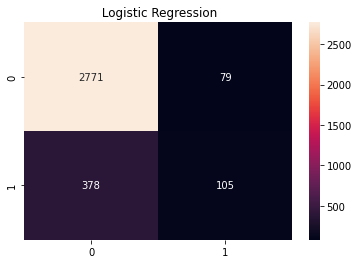

In [331]:
from sklearn import metrics

LG = LogisticRegression()
LG.fit(x,y)
y_pred = LG.predict(x)
LG_conf_matrix = metrics.confusion_matrix(y , y_pred)
sns.heatmap(LG_conf_matrix , annot=True , fmt='')
plt.title(' Logistic Regression')

c:\Users\jebalia\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0.5, 1.0, 'KNeighbors Classifier')

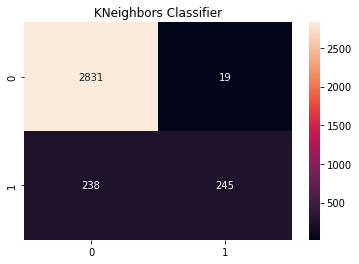

In [332]:
KNN = KNeighborsClassifier()
KNN.fit(x,y)
y_pred = KNN.predict(x)
KNN_conf_matrix = metrics.confusion_matrix(y , y_pred)
sns.heatmap(KNN_conf_matrix , annot=True , fmt='')
plt.title('KNeighbors Classifier')

Text(0.5, 1.0, ' Gradient Boosting Classifier')

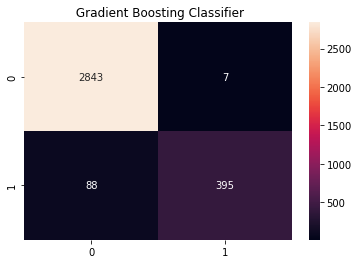

In [333]:
GBC = GradientBoostingClassifier()
GBC.fit(x,y)
y_pred = GBC.predict(x)
GBC_conf_matrix = metrics.confusion_matrix(y , y_pred)
sns.heatmap(GBC_conf_matrix , annot=True , fmt='')
plt.title(' Gradient Boosting Classifier')

Text(0.5, 1.0, ' SVC')

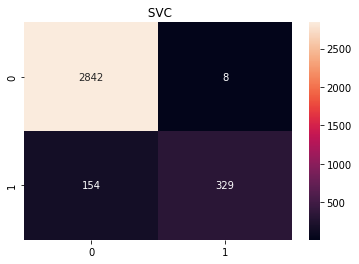

In [334]:
SVC = SVC()
SVC.fit(x,y)
y_pred = SVC.predict(x)
SVC_conf_matrix = metrics.confusion_matrix(y , y_pred)
sns.heatmap(SVC_conf_matrix , annot=True , fmt='')
plt.title(' SVC')

Text(0.5, 1.0, ' Random Forest  Classifie')

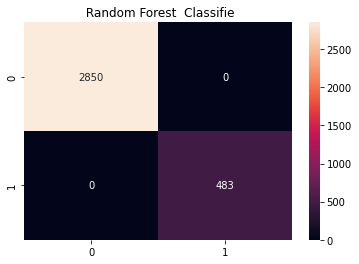

In [335]:
RFC = RandomForestClassifier()
RFC.fit(x,y)
y_pred = RFC.predict(x)
RFC_conf_matrix = metrics.confusion_matrix(y , y_pred)
sns.heatmap(RFC_conf_matrix , annot=True , fmt='')
plt.title(' Random Forest  Classifie')

it seems that the Random Forest is the best model to select

FINAL MODEL SELECTION

In [336]:

RFC =RandomForestClassifier()
RFC.fit(x, y)

RandomForestClassifier()

[0.02394444 0.0284034  0.00714495 0.07932968 0.02093876 0.02978061
 0.12711547 0.03129796 0.14801863 0.06479523 0.02842882 0.06085325
 0.03614931 0.02941112 0.03637742 0.04211963 0.04777637 0.0405347
 0.11758026]


<AxesSubplot:>

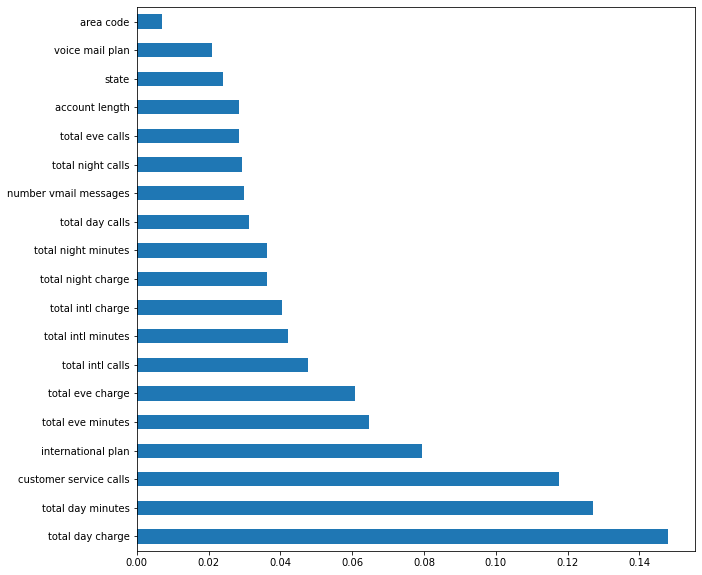

In [337]:
# Get Feature Importance from the classifier
feature_importance = RFC.feature_importances_
print (RFC.feature_importances_)
feat_importances = pd.Series(RFC.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 